### The following is a code which implements the ensemble sampler from the [emcee](http://dan.iel.fm/emcee/current/ "MCMC python")  considering a toy multivariate example. 

In [2]:

import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

import emcee
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import corner




## Contour plot of the likelihood function is the output of the code below

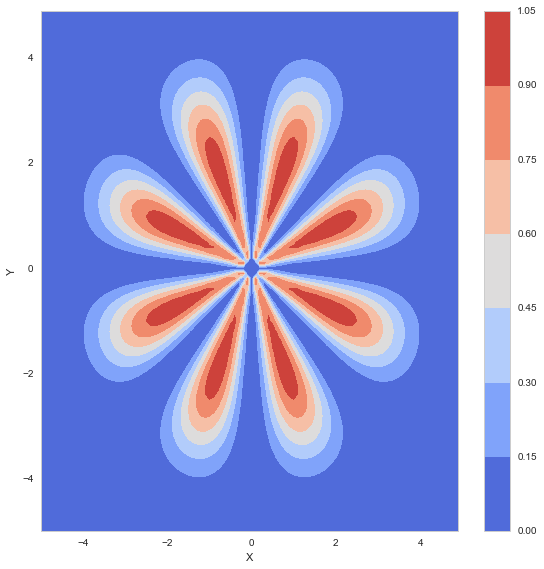

In [3]:
fig = plt.figure()
fig.set_size_inches(8, 8)
#ax = fig.gca(projection='3d')
X = np.arange(-5, 5,0.1)
Y = np.arange(-5, 5,0.1)
X, Y = np.meshgrid(X, Y)
Z = np.exp(-((X**2+Y**2-4)/10)**2)*np.sin(4*np.arctan(Y/X))**2
#Z = np.sin(X**2+Y**2)
surf = plt.contourf(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0)
#ax.set_zlim(-100, 100)

#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
#ax.view_init(90,-270)
fig.colorbar(surf, shrink=1, aspect=20)

plt.xlabel("X")
plt.ylabel("Y")
plt.tight_layout()

## The log probability is defined below which includes the natural log of the prior and likelihood

In [4]:
def lnprior(p):
    
    if -50.0 <= p[0]<=50.0 and -50.0<=p[1]<=50.0:
        return 0
    return -np.inf


def lnprob1(p):
    #X,y =p
    #a=1
    lp= lnprior(p)
    diff =lp+np.log(np.exp(-((p[0]**2+p[1]**2-4)/10)**2)*np.sin(4*np.arctan(p[1]/p[0]))**2)
   
        
    return diff

## Preparing for the Ensemble here ndim is the number of dimensions in parameter space and the number of walker represents the ensemble

In [5]:

ndim = 2

nwalkers =250

p1 = [np.random.rand(ndim) for i in range(nwalkers)]


## Sampling along with the contours and the distributions are shown below

In [6]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob1,a=2.00)

pos, prob, state = sampler.run_mcmc(p1,100)
sampler.reset()

### further to check the features sampling from the place where the previous walker left off which is the pos

In [7]:
pos, prob, state = sampler.run_mcmc(pos, 2000)



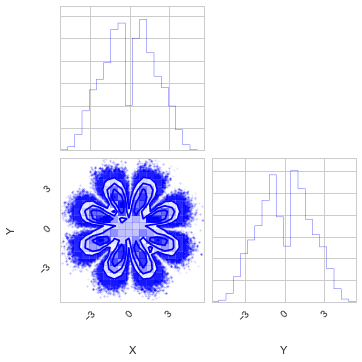

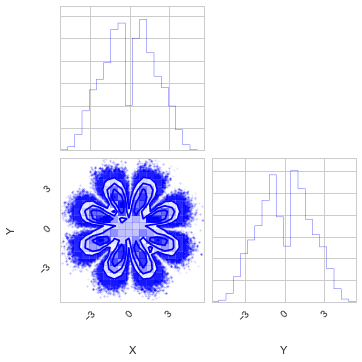

In [8]:

#fig = plt.corner()
fig.set_size_inches(18, 18.5)
corner.corner(sampler.flatchain,color='b',labels=["X",'Y'],alpha=10)

The plots below show the ensembles for both the parameters X and Y and how they move with the number of steps

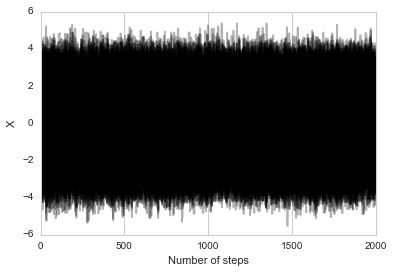

In [9]:
#ax1 = fig.gca(projection='1d')

plt.plot(sampler.chain[:,:,1].T, '-', color='k', alpha=0.3)
plt.xlabel('Number of steps')
plt.ylabel("X")
#ax.hline(alpha_true, color='blue')
plt.show()

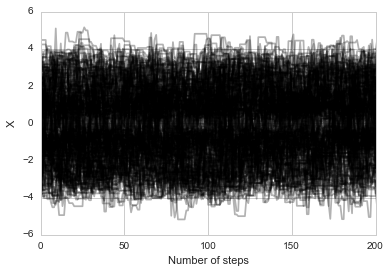

In [10]:
plt.plot(sampler.chain[:,:,0].T, '-', color='k', alpha=0.3)
#ax1.hline(alpha_true, color='blue')
plt.xlabel('Number of steps')
plt.ylabel("X")
plt.xlim(0,200)
plt.show()

 One of the measures which show that the sampling is performed well with the scale parameter a is the mean acceptance fraction which should be in the region 0.25 to 0.5 for a good sampling [emcee sampling example](http://dan.iel.fm/emcee/current/user/quickstart/#how-to-sample-a-multi-dimensional-gaussian "example")

In [11]:
print "mean acceptance fraction of the samples in each walker %0.3f " %np.mean(sampler.acceptance_fraction)

mean acceptance fraction of the samples in each walker 0.509 


R Gelman and Rubin p varience of chain / 